C:\Users\aleja\AppData\Local\Temp\ipykernel_15368\1431374527.py:86: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


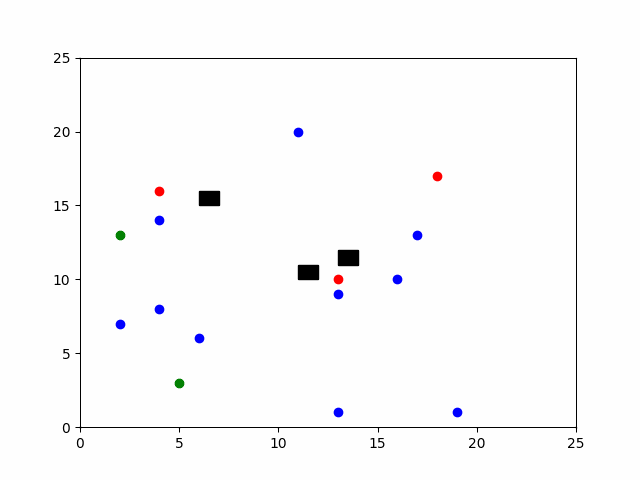

In [40]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import imageio
import os
from IPython.display import display, Image

# Definición de clases
class Agent:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def move(self):
        self.x += random.randint(-1, 1)
        self.y += random.randint(-1, 1)

class Prey(Agent):
    def __init__(self, x, y):
        super().__init__(x, y)

class Predator(Agent):
    def __init__(self, x, y):
        super().__init__(x, y)

class Hunter(Predator):
    def chase(self, prey):
        if prey.x > self.x:
            self.x += 1
        elif prey.x < self.x:
            self.x -= 1

        if prey.y > self.y:
            self.y += 1
        elif prey.y < self.y:
            self.y -= 1

class Ambusher(Predator):
    def ambush(self, prey):
        if abs(prey.x - self.x) < 3 and abs(prey.y - self.y) < 3:
            self.x = prey.x
            self.y = prey.y

# Crear agentes y obstáculos
preys = [Prey(random.randint(0, 20), random.randint(0, 20)) for _ in range(10)]
hunters = [Hunter(random.randint(0, 20), random.randint(0, 20)) for _ in range(3)]
ambushers = [Ambusher(random.randint(0, 20), random.randint(0, 20)) for _ in range(2)]
obstacles = [(random.randint(5, 15), random.randint(5, 15)) for _ in range(3)]

filenames = []  # Lista para guardar los nombres de los archivos de las imágenes

# Simulación
for i in range(100):
    fig, ax = plt.subplots()
    for p in preys:
        p.move()
        plt.scatter(p.x, p.y, color='blue')

    for h in hunters:
        prey = random.choice(preys)
        h.chase(prey)
        plt.scatter(h.x, h.y, color='red')

    for a in ambushers:
        prey = random.choice(preys)
        a.ambush(prey)
        plt.scatter(a.x, a.y, color='green')

    for ox, oy in obstacles:
        rect = patches.Rectangle((ox, oy), 1, 1, linewidth=1, edgecolor='black', facecolor='black')
        ax.add_patch(rect)

    plt.xlim(0, 25)
    plt.ylim(0, 25)

    # Guardar imagen
    filename = f'frame_{i}.png'
    plt.savefig(filename)
    filenames.append(filename)

    plt.close()

# Crear GIF
with imageio.get_writer('simulation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        os.remove(filename)

display(Image(filename="simulation.gif"))


1. ¿Qué comportamientos puede observar en los depredadores?

En nuestro modelo existen dos tipo de depredadores, los casadores los cuales tienen un comportamiento de persecucion, en donde seleccionan aleatoriamente una presa y se mueven hacia ella. Mientras que el otro tipo de depredador los emboscadores los cuales tienen un compartamiento más tactico es decir que suelen esperar a que la presa se encuentre en un  rango cercano al de su posicion para poderla atacar.

2. ¿Cómo mejoraría este modelo?

Una forma de mejorar este modelo es añadiendo un comportamiento de huida para las presas, es decir que cuando un depredador se encuentre cerca de una presa esta pueda huir de el, para asi evitar ser cazada.

Ademas de ello se podria integrar nuevas tacticas a los de depredadores con la finalidad de no estar esperando a que la presa se encuentre cerca de su posicion para poder atacarla, sino que puedan ir a colocarse a lugares más tacticos. O que entre los mismos depredadores se puedan ayudar para poder cazar a las presas.

In [70]:
import random
import matplotlib.pyplot as plt
import imageio

class Vehicle:
    def __init__(self, pos, speed, lane):
        self.pos = pos
        self.speed = speed
        self.lane = lane

    def move(self):
        self.pos += self.speed

class AggressiveVehicle(Vehicle):
    def is_safe_to_change(self, target_lane, vehicles):
        for vehicle in vehicles:
            if vehicle.lane == target_lane and abs(vehicle.pos - self.pos) < 5:
                return False
        return True

    def change_lane(self, lanes, vehicles):
        if random.random() < 0.8:
            target_lane = 1 - self.lane
            
            if self.is_safe_to_change(target_lane, vehicles):
                self.lane = target_lane

class CautiousVehicle(Vehicle):
    def keep_distance(self, vehicles):
        for vehicle in vehicles:
            if vehicle.lane == self.lane and vehicle.pos > self.pos:
                self.speed = min(self.speed, vehicle.speed - 0.1)

def check_collision(vehicles):
    to_remove = []
    for i, vehicle1 in enumerate(vehicles):
        for j, vehicle2 in enumerate(vehicles[i+1:]):
            if vehicle1.lane == vehicle2.lane and abs(vehicle1.pos - vehicle2.pos) < 1:
                to_remove.extend([vehicle1, vehicle2])
    return [v for v in vehicles if v not in to_remove]


def simulate_traffic(num_steps, num_vehicles):
    lanes = [0, 1]
    vehicles = [random.choice([AggressiveVehicle, CautiousVehicle])(random.randint(0, 50), random.uniform(1, 2), random.choice(lanes)) for _ in range(num_vehicles)]

    filenames = []

    for step in range(num_steps):
        plt.figure(figsize=(12, 2))


        for vehicle in vehicles:
            vehicle.move()

            if isinstance(vehicle, AggressiveVehicle):
                vehicle.change_lane(lanes, vehicles)

            if isinstance(vehicle, CautiousVehicle):
                vehicle.keep_distance(vehicles)
        
        vehicles = check_collision(vehicles)
        for vehicle in vehicles:
            plt.scatter(vehicle.pos, vehicle.lane, c='r' if isinstance(vehicle, AggressiveVehicle) else 'b', s=50)

        plt.xlim(0, 100)
        plt.ylim(-1, len(lanes))

        filename = f'frame_{step}.png'
        plt.savefig(filename)
        filenames.append(filename)

        plt.close()

    with imageio.get_writer('traffic_simulation.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
            os.remove(filename)



In [71]:
simulate_traffic(50, 20)

C:\Users\aleja\AppData\Local\Temp\ipykernel_15368\677518394.py:79: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


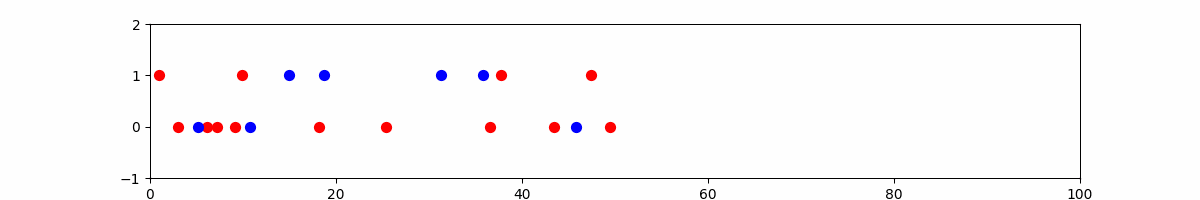

In [73]:
display(Image(filename="traffic_simulation.gif"))

1. ¿Qué comportamientos puede observar en los diferentes tipos de comportamiento de manejo de vehículos?

En nuestro modelo existen dos tipos de vehículos los primeros son los vehículos cautelosos, los cuales tienen un comportamiento de precaución es decir que mantendrá una distancia de seguridad con el vehículo que se encuentre delante de ellos además de ello dentro de su comportamiento siempre estará el no buscar cambiarse de carril para estar más seguro, mientras que el otro tipo de vehículos son los agresivos los cuales tienen un comportamiento agresivo, es decir que no tomará en cuenta esa distancia de precaución, además de estos vehículos siempre estarán buscando cambiarse de carril para llegar de manera más rápida a la meta.

2. ¿Cómo mejoraría este modelo?

Una forma de mejorar este modelo es crear una implementación más realista sobre la manera en la que los carros van acelerando y frenando, haciendo que se tome en cuenta la consideración de la velocidad máxima y la aceleración/deceleración gradual.

También se podrá implementar un modelo de cambio de carril más elaborado que tome en cuenta factores como la velocidad y la distancia relativa con los vehículos en el carril objetivo, las señales de tráfico y las preferencias individuales de cambio de carril.

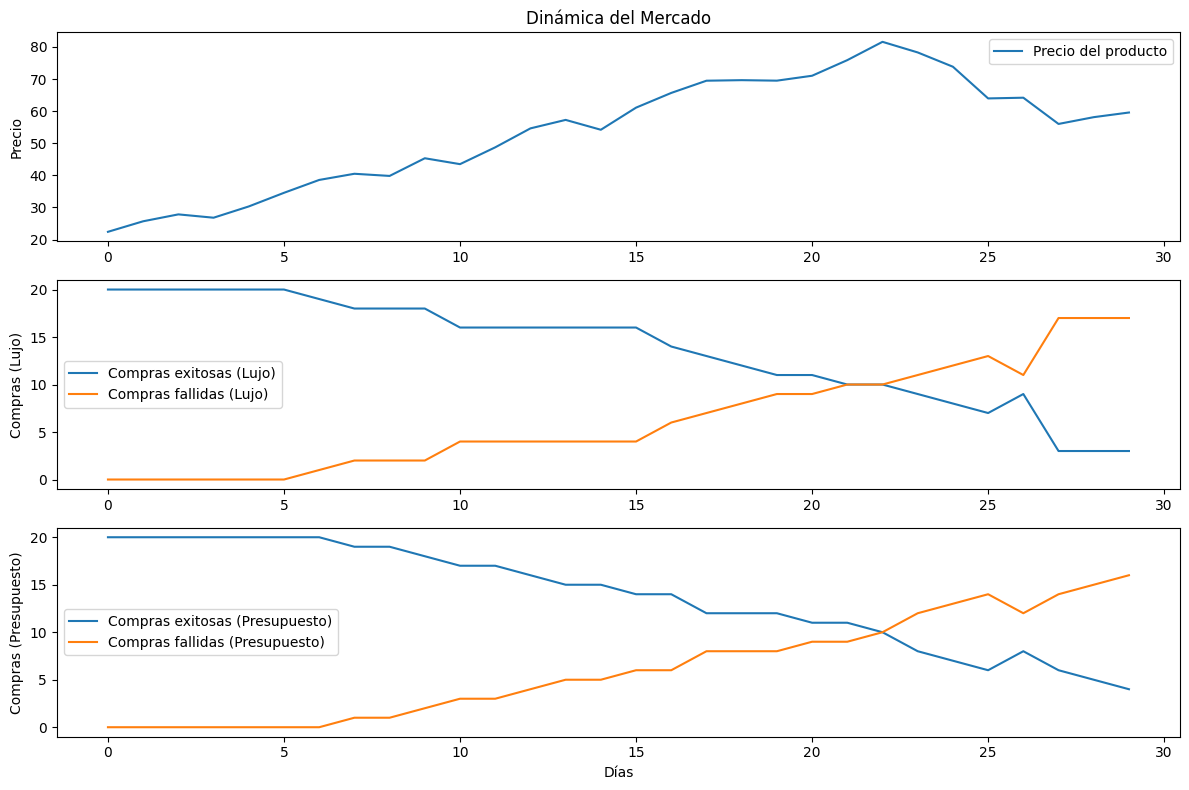

In [99]:
import random
import matplotlib.pyplot as plt

class Comprador:
    def __init__(self, dinero):
        self.dinero = dinero

    def comprar(self, precio):
        if precio <= self.dinero:
            self.dinero -= precio
            return True
        return False

class CompradorLujo(Comprador):
    def __init__(self, dinero):
        super().__init__(dinero)

    def comprar(self, precio):
        precio = precio * random.uniform(1.0, 1.2)
        if precio <= self.dinero:
            self.dinero -= precio
            return True
        return False

class CompradorPresupuesto(Comprador):
    def __init__(self, dinero):
        super().__init__(dinero)

    def comprar(self, precio):
        precio = precio * random.uniform(0.8, 1.0)
        if precio <= self.dinero:
            self.dinero -= precio
            return True
        return False

def ajustar_precio(compras_exitosas, compras_fallidas, precio_actual):
    ratio = compras_exitosas / (compras_exitosas + compras_fallidas + 1)
    ajuste = random.uniform(0.9, 1.1)
    if ratio > 0.6:
        return precio_actual * 1.05 * ajuste 
    elif ratio < 0.4:
        return precio_actual * 0.95 * ajuste
    else:
        return precio_actual * ajuste


compradores_lujo = [CompradorLujo(random.randint(120, 2000)) for _ in range(20)]
compradores_presupuesto = [CompradorPresupuesto(random.randint(120, 2000)) for _ in range(20)] 
precio = 20

historico_precio = []
historico_compras_exitosas_lujo = []
historico_compras_fallidas_lujo = []
historico_compras_exitosas_presupuesto = []
historico_compras_fallidas_presupuesto = []

for dia in range(30):
    compras_exitosas_lujo = 0
    compras_fallidas_lujo = 0
    compras_exitosas_presupuesto = 0
    compras_fallidas_presupuesto = 0

    for comprador in compradores_lujo:
        if comprador.comprar(precio):
            compras_exitosas_lujo += 1
        else:
            compras_fallidas_lujo += 1

    for comprador in compradores_presupuesto:
        if comprador.comprar(precio):
            compras_exitosas_presupuesto += 1
        else:
            compras_fallidas_presupuesto += 1

    precio = ajustar_precio(compras_exitosas_lujo + compras_exitosas_presupuesto,
                            compras_fallidas_lujo + compras_fallidas_presupuesto,
                            precio)

    historico_precio.append(precio)
    historico_compras_exitosas_lujo.append(compras_exitosas_lujo)
    historico_compras_fallidas_lujo.append(compras_fallidas_lujo)
    historico_compras_exitosas_presupuesto.append(compras_exitosas_presupuesto)
    historico_compras_fallidas_presupuesto.append(compras_fallidas_presupuesto)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(historico_precio, label='Precio del producto')
plt.title('Dinámica del Mercado')
plt.ylabel('Precio')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(historico_compras_exitosas_lujo, label='Compras exitosas (Lujo)')
plt.plot(historico_compras_fallidas_lujo, label='Compras fallidas (Lujo)')
plt.ylabel('Compras (Lujo)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(historico_compras_exitosas_presupuesto, label='Compras exitosas (Presupuesto)')
plt.plot(historico_compras_fallidas_presupuesto, label='Compras fallidas (Presupuesto)')
plt.xlabel('Días')
plt.ylabel('Compras (Presupuesto)')
plt.legend()

plt.tight_layout()
plt.show()

1. ¿Qué comportamientos puede observar en los diferentes tipos de preferencias y estrategias?

Existen 2 tipos de compradores, tenemos los compradores de lujo, estos están dispuestos a pagar un 20% más que el precio estándar por un producto. Esto significa que tienen un umbral de precio más alto para realizar una compra. Y por último tenemos los compradores de presupuesto, estos buscan un descuento del 20% en comparación con el precio estándar. Esto significa que solo comprarán si el precio es un 20% menor de lo que inicialmente está establecido. 

Como se puede ver en la simulacion los compradores de lujo suelen tenemos menor cantidad de compras fallidas debido a que tienen ese rango extra en el precio puede variar y de todas formas realizaran la compra, mientras que en el lado de los compradores de presupuesto suelen tener mayor cantidad de compras fallidas debido a que su rango de precio es menor y si el precio es mayor a lo que ellos estan dispuestos a pagar no realizaran la compra.

2. ¿Cómo mejoraría este modelo?

Entre las modificaciones que se podrian realizar a este modelo es que se pueda añadir un comportamiento más realista de compra, por ejemplo se podría incorporar preferencias individuales, niveles de lealtad a la marca, consideración de productos sustitutos, etc. Esto podría influir en su decisión de compra.

Además de ello se podria mejorar el modelo de ajuste de precio haciendo que se puedan tomar en cuenta factores como la demanda, la oferta, la competencia, etc. Esto podría influir en la cantidad de compras que se realicen.